# Red wine analysis

## Import all the libraries necessary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import dataset

In [3]:
# import dataset

df=pd.read_csv('./dataset/winequality-red.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Basic Data Understanding

### Before analysis, do:

1. Check structure

- Number of rows, columns

- Data types (numeric, categorical, date)

2. Check missing values

- Count missing values

- Percentage missing

3. Check duplicates

- Number of duplicated rows

In [4]:
# Data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* In this we can see that all features are either int or float type

> Conclusion: We do not need to do cleaning much for the given datset

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Number of rows and columes

df.shape

(1599, 12)

> In this dataset there are 1599 rows (Samples) and 12 columns (features)

In [7]:
# Check missing values

print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


> From the above we can say that our data have all values

In [8]:
missing_values=df.isnull().sum().sum()
total_values=df.shape[0]*df.shape[1]

print(missing_values, total_values)

0 19188


### Missing percentage

In [9]:
missing_percent=(missing_values/total_values)*100
print(missing_percent)

0.0


> No null value is present in this dataset

### Check duplicates

In [10]:
duplicated=df.duplicated().sum()
duplicated_any=df.duplicated().any()

print(duplicated_any, duplicated)

True 240


> So in this dataset we have some duplicates rows and the number of duplicates are 240

# Univariate Analysis (Single Variable Analysis)

1. For Numerical Columns

- Mean, Median, Mode
- Min, Max
- Range
- Variance & Standard Deviation
- Quartiles (Q1, Q3)
- Interquartile Range (IQR)
- Coefficient of Variation
- Skewness
- Kurtosis

2. Visuals

- Histogram
- Boxplot
- Violin plot

## For Numerical Columns

### Mean, Meadian, Mode

In [11]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [12]:

mean_values=np.round(df.mean(numeric_only=True), 2)
print(mean_values)

fixed acidity            8.32
volatile acidity         0.53
citric acid              0.27
residual sugar           2.54
chlorides                0.09
free sulfur dioxide     15.87
total sulfur dioxide    46.47
density                  1.00
pH                       3.31
sulphates                0.66
alcohol                 10.42
quality                  5.64
dtype: float64


In [13]:
mean_values_dic=mean_values.to_dict()
print(mean_values_dic)

{'fixed acidity': 8.32, 'volatile acidity': 0.53, 'citric acid': 0.27, 'residual sugar': 2.54, 'chlorides': 0.09, 'free sulfur dioxide': 15.87, 'total sulfur dioxide': 46.47, 'density': 1.0, 'pH': 3.31, 'sulphates': 0.66, 'alcohol': 10.42, 'quality': 5.64}


In [14]:
median_values=np.round(df.median(numeric_only=True), 2)

print(median_values)

fixed acidity            7.90
volatile acidity         0.52
citric acid              0.26
residual sugar           2.20
chlorides                0.08
free sulfur dioxide     14.00
total sulfur dioxide    38.00
density                  1.00
pH                       3.31
sulphates                0.62
alcohol                 10.20
quality                  6.00
dtype: float64


In [15]:
median_values_dic=median_values.to_dict()
print(median_values_dic)

{'fixed acidity': 7.9, 'volatile acidity': 0.52, 'citric acid': 0.26, 'residual sugar': 2.2, 'chlorides': 0.08, 'free sulfur dioxide': 14.0, 'total sulfur dioxide': 38.0, 'density': 1.0, 'pH': 3.31, 'sulphates': 0.62, 'alcohol': 10.2, 'quality': 6.0}


In [16]:
import statistics

In [17]:
mode_values=round(df.mode(),2)
print(mode_values)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.2               0.6          0.0             2.0       0.08   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                  6.0                  28.0      1.0  3.3        0.6   

   alcohol  quality  
0      9.5        5  


In [18]:
mode_values.loc[0]

fixed acidity            7.20
volatile acidity         0.60
citric acid              0.00
residual sugar           2.00
chlorides                0.08
free sulfur dioxide      6.00
total sulfur dioxide    28.00
density                  1.00
pH                       3.30
sulphates                0.60
alcohol                  9.50
quality                  5.00
Name: 0, dtype: float64

In [19]:
mode_values_dic=mode_values.loc[0].to_dict()
print(mode_values_dic)

{'fixed acidity': 7.2, 'volatile acidity': 0.6, 'citric acid': 0.0, 'residual sugar': 2.0, 'chlorides': 0.08, 'free sulfur dioxide': 6.0, 'total sulfur dioxide': 28.0, 'density': 1.0, 'pH': 3.3, 'sulphates': 0.6, 'alcohol': 9.5, 'quality': 5.0}


In [20]:
compare_df=pd.DataFrame([mean_values_dic, median_values_dic, mode_values_dic], index=["mean", "median","mode"])
compare_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.0,3.31,0.66,10.42,5.64
median,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.0,3.31,0.62,10.20,6.00
mode,7.20,0.60,0.00,2.00,0.08,6.00,28.00,1.0,3.30,0.60,9.50,5.00


In [21]:
compare_df.index.name='Statistics'

> From the above we can see the comparision between the mean, median and mode of each feature given in dataset

In [22]:
compare_df.to_csv('./python_output/mean_median_mode_output.csv', sep=',')

> Mean median and mode of the data for each feature is saved as CSV file.

In [23]:
# min and max

min_values=round(df.min(),2)
print(min_values)

max_values=round(df.max())
print(max_values)

fixed acidity           4.60
volatile acidity        0.12
citric acid             0.00
residual sugar          0.90
chlorides               0.01
free sulfur dioxide     1.00
total sulfur dioxide    6.00
density                 0.99
pH                      2.74
sulphates               0.33
alcohol                 8.40
quality                 3.00
dtype: float64
fixed acidity            16.0
volatile acidity          2.0
citric acid               1.0
residual sugar           16.0
chlorides                 1.0
free sulfur dioxide      72.0
total sulfur dioxide    289.0
density                   1.0
pH                        4.0
sulphates                 2.0
alcohol                  15.0
quality                   8.0
dtype: float64


In [24]:
# Putting in structure format

min_values=min_values.to_dict()
max_values=max_values.to_dict()


In [25]:

min_max_df=pd.DataFrame([min_values, max_values], index=["Min", "Max"])

min_max_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Min,4.6,0.12,0.0,0.9,0.01,1.0,6.0,0.99,2.74,0.33,8.4,3.0
Max,16.0,2.00,1.0,16.0,1.00,72.0,289.0,1.00,4.00,2.00,15.0,8.0


In [26]:
feature_range=min_max_df.loc['Max']-min_max_df.loc["Min"]
print(feature_range)

fixed acidity            11.40
volatile acidity          1.88
citric acid               1.00
residual sugar           15.10
chlorides                 0.99
free sulfur dioxide      71.00
total sulfur dioxide    283.00
density                   0.01
pH                        1.26
sulphates                 1.67
alcohol                   6.60
quality                   5.00
dtype: float64


In [27]:
min_max_df.loc["Range"]=feature_range
min_max_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Min,4.6,0.12,0.0,0.9,0.01,1.0,6.0,0.99,2.74,0.33,8.4,3.0
Max,16.0,2.00,1.0,16.0,1.00,72.0,289.0,1.00,4.00,2.00,15.0,8.0
Range,11.4,1.88,1.0,15.1,0.99,71.0,283.0,0.01,1.26,1.67,6.6,5.0


> We can clearly observe the spreadness of each feature

### Variance, standard variance and quartile

In [28]:
var_values=df.var()
print(var_values)

fixed acidity              3.031416
volatile acidity           0.032062
citric acid                0.037947
residual sugar             1.987897
chlorides                  0.002215
free sulfur dioxide      109.414884
total sulfur dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64


In [29]:
std_values=df.std()
print(std_values)

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64


In [30]:
Q_values=round(df.quantile([.25, .75]),2)
print(Q_values)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0.25            7.1              0.39         0.09             1.9       0.07   
0.75            9.2              0.64         0.42             2.6       0.09   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0.25                  7.0                  22.0      1.0  3.21       0.55   
0.75                 21.0                  62.0      1.0  3.40       0.73   

      alcohol  quality  
0.25      9.5      5.0  
0.75     11.1      6.0  


In [31]:
Q_values.index=["Q1", "Q3"]

In [32]:
Q_values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Q1,7.1,0.39,0.09,1.9,0.07,7.0,22.0,1.0,3.21,0.55,9.5,5.0
Q3,9.2,0.64,0.42,2.6,0.09,21.0,62.0,1.0,3.40,0.73,11.1,6.0


In [33]:
IQR_values=Q_values.loc['Q3']-Q_values.loc['Q1']
print(IQR_values)
print(type(IQR_values))

fixed acidity            2.10
volatile acidity         0.25
citric acid              0.33
residual sugar           0.70
chlorides                0.02
free sulfur dioxide     14.00
total sulfur dioxide    40.00
density                  0.00
pH                       0.19
sulphates                0.18
alcohol                  1.60
quality                  1.00
dtype: float64
<class 'pandas.core.series.Series'>


In [34]:
Q_values.loc['IQR']=IQR_values

In [35]:
Q_values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Q1,7.1,0.39,0.09,1.9,0.07,7.0,22.0,1.0,3.21,0.55,9.5,5.0
Q3,9.2,0.64,0.42,2.6,0.09,21.0,62.0,1.0,3.40,0.73,11.1,6.0
IQR,2.1,0.25,0.33,0.7,0.02,14.0,40.0,0.0,0.19,0.18,1.6,1.0


> From the above we can find the Q1, Q3 and IQR values of features

### Coefficient of variation

In [36]:
# Coefficient of variation is calculated by (standard variance/mean)*100

CV=(std_values/mean_values)*100
print(round(CV,2))

fixed acidity           20.93
volatile acidity        33.78
citric acid             72.15
residual sugar          55.51
chlorides               52.29
free sulfur dioxide     65.91
total sulfur dioxide    70.79
density                  0.19
pH                       4.66
sulphates               25.68
alcohol                 10.23
quality                 14.32
dtype: float64


In [37]:
pd.DataFrame([round(CV,2)], index=["CV"])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
CV,20.93,33.78,72.15,55.51,52.29,65.91,70.79,0.19,4.66,25.68,10.23,14.32


In [38]:
skewness_df=pd.DataFrame([df.skew()], index=["Skewness"])
skewness_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Skewness,0.982751,0.671593,0.318337,4.540655,5.680347,1.250567,1.515531,0.071288,0.193683,2.428672,0.860829,0.217802


> From the above analysis we can see that all values are > 0, meant that all are right skewed distribution.

* Here we can also conclude that residual sugar and chlorides have most outliers in their records
* And density and pH are less skewed

### Kurtosis

In [39]:
kurtosis_value=df.kurtosis()

kurtosis_df=pd.DataFrame([kurtosis_value], index=["Kurtosis"])

kurtosis_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Kurtosis,1.132143,1.225542,-0.788998,28.617595,41.715787,2.023562,3.809824,0.934079,0.806943,11.720251,0.200029,0.296708


> Here we can observe that chloride and residual sugar feature have the highest peak on the otherhand, citric acid and alcohol have the lowest peak.

* Leptokurtic: chlorides and residual sugar
* Platykurtic: citric acid and alcohol

## Visuals

### Histogram

In [40]:
df.shape[1]

12

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


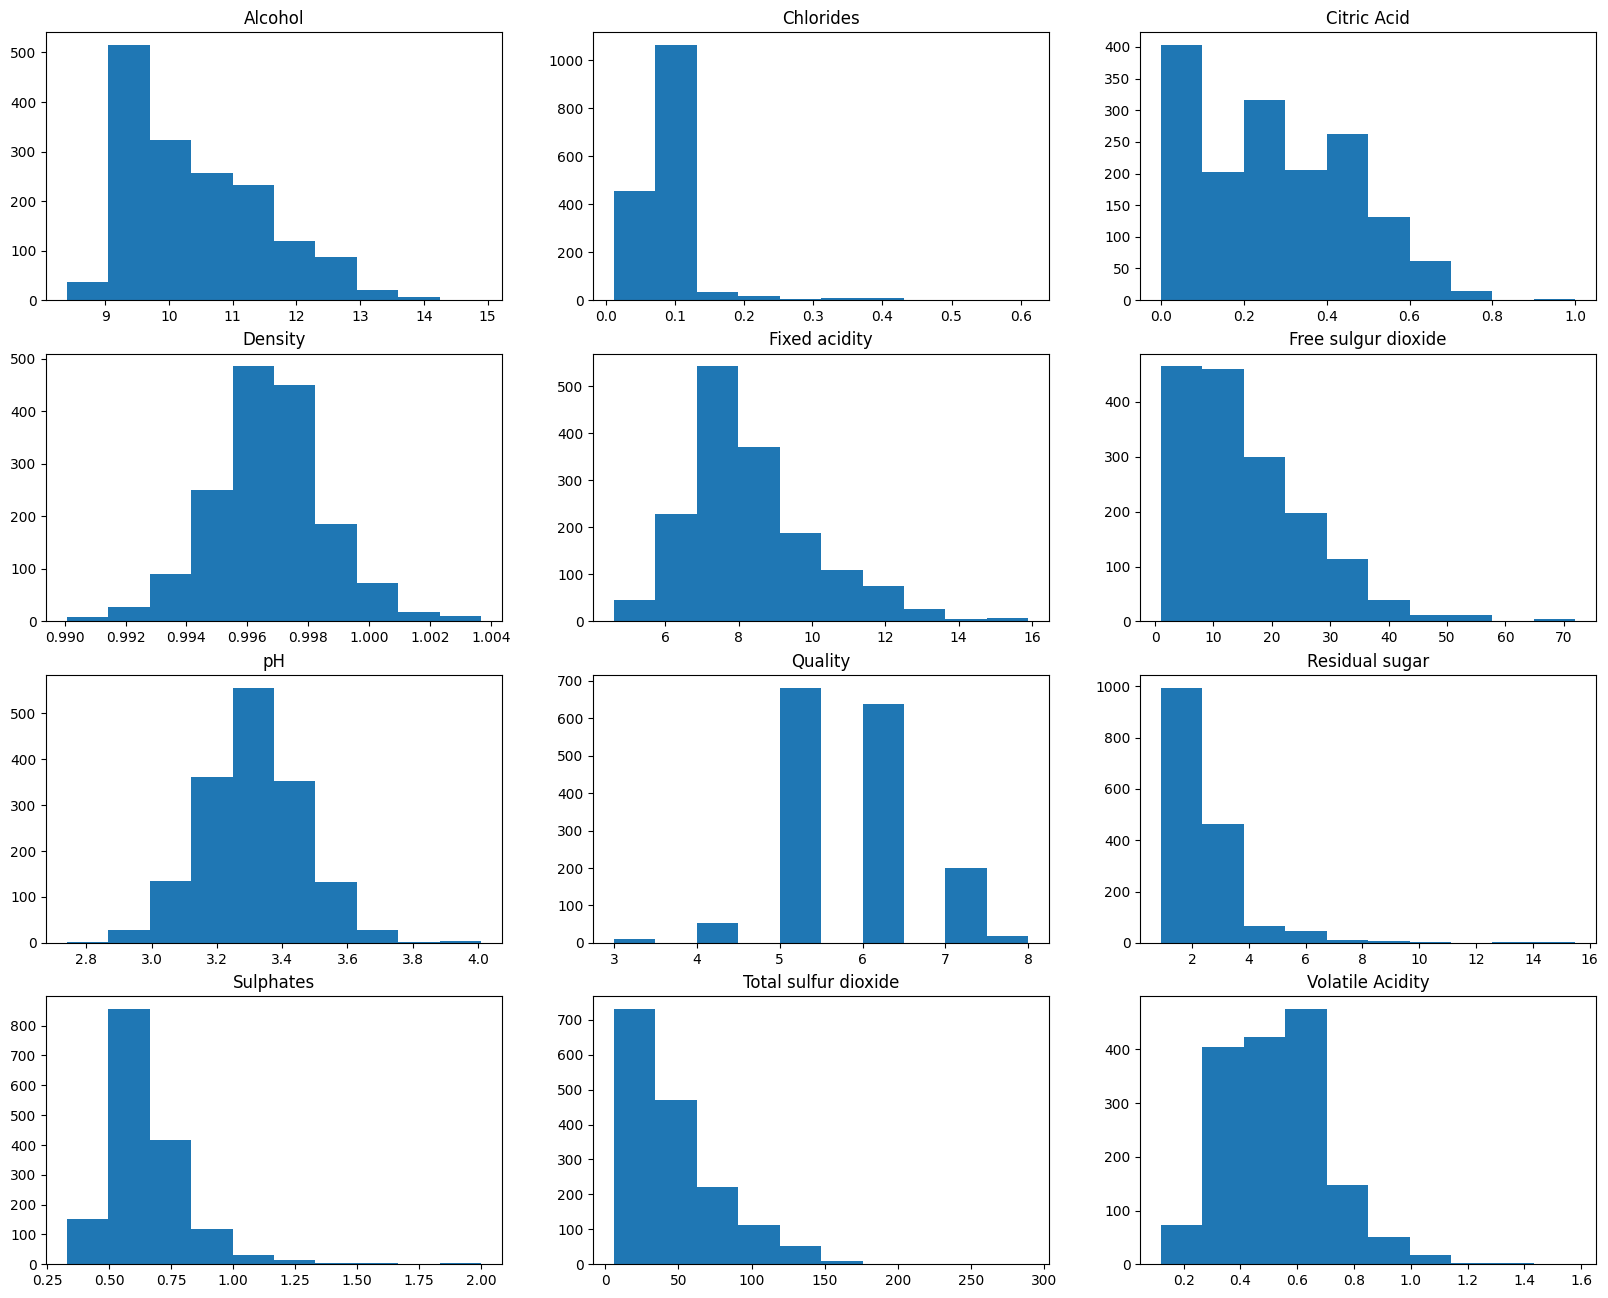

In [42]:
plt.figure(figsize=(20, 16))

plt.subplot(4,3,1)
plt.hist(df['alcohol'])
plt.title("Alcohol")

plt.subplot(4,3,2)
plt.hist(df['chlorides'])
plt.title("Chlorides")

plt.subplot(4,3,3)
plt.hist(df['citric acid'])
plt.title("Citric Acid")

plt.subplot(4,3,4)
plt.hist(df['density'])
plt.title("Density")


plt.subplot(4,3,5)
plt.hist(df['fixed acidity'])
plt.title("Fixed acidity")


plt.subplot(4,3,6)
plt.hist(df['free sulfur dioxide'])
plt.title("Free sulgur dioxide")


plt.subplot(4,3,7)
plt.hist(df['pH'])
plt.title("pH")


plt.subplot(4,3,8)
plt.hist(df['quality'])
plt.title("Quality")


plt.subplot(4,3,9)
plt.hist(df['residual sugar'])
plt.title("Residual sugar")


plt.subplot(4,3,10)
plt.hist(df['sulphates'])
plt.title("Sulphates")


plt.subplot(4,3,11)
plt.hist(df['total sulfur dioxide'])
plt.title("Total sulfur dioxide")


plt.subplot(4,3,12)
plt.hist(df['volatile acidity'])
plt.title("Volatile Acidity")

plt.show()

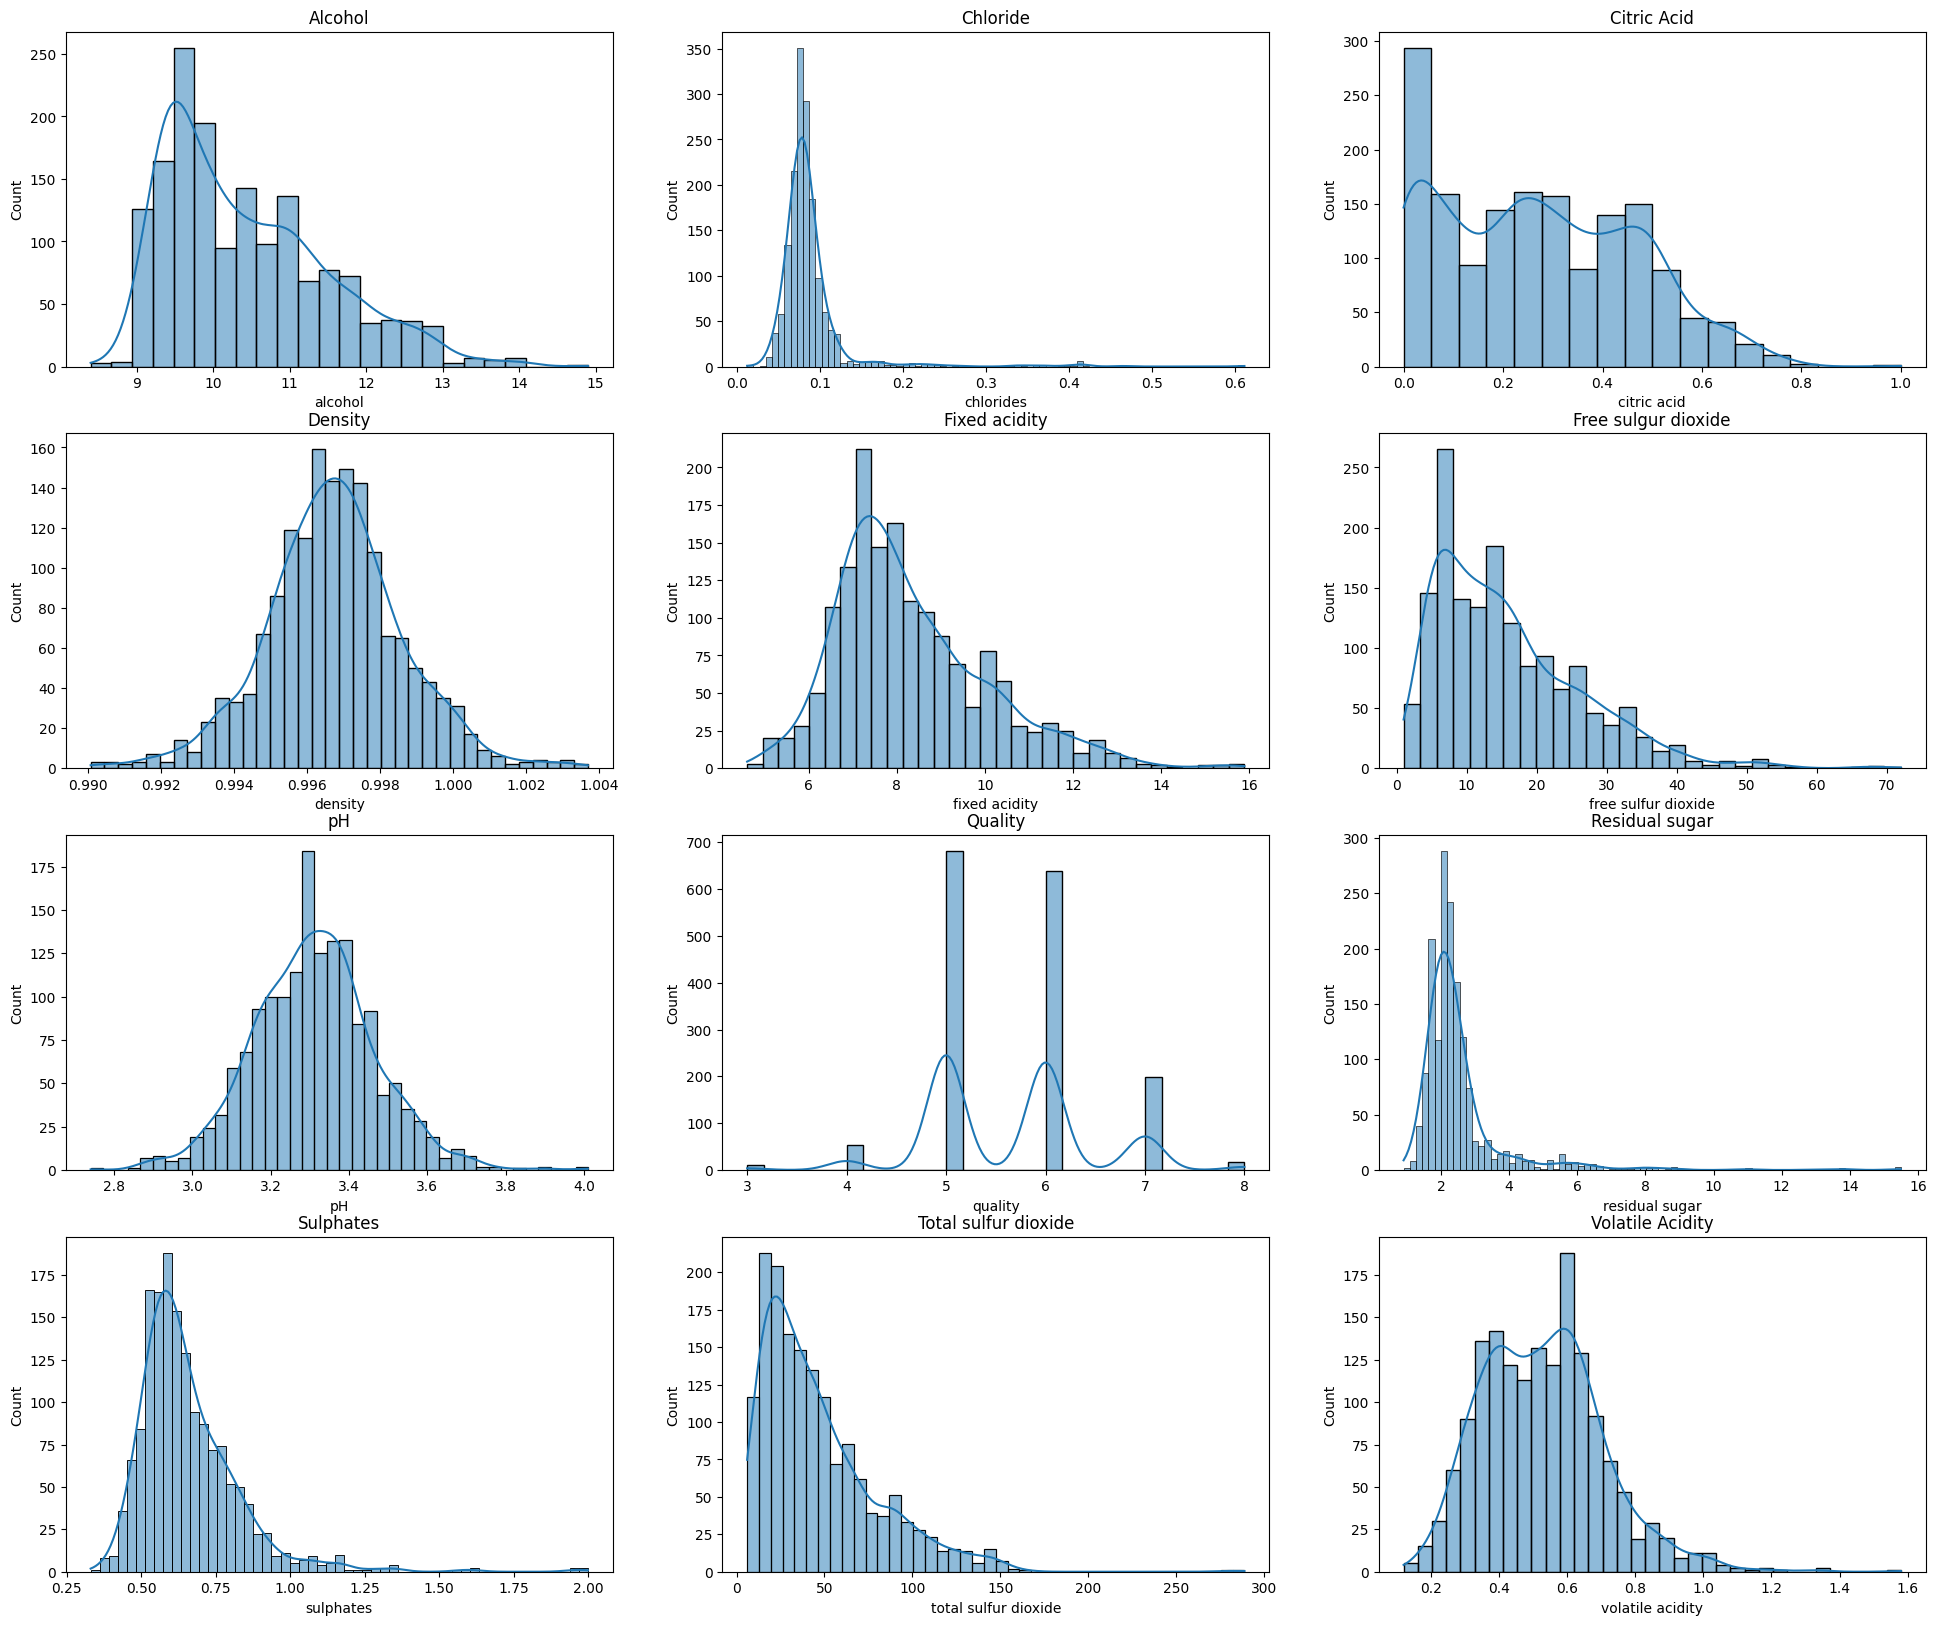

In [43]:
plt.figure(figsize=(24, 20))

plt.subplot(4,3,1)
sns.histplot(df['alcohol'], kde=True)
plt.title("Alcohol")


plt.subplot(4,3,2)
sns.histplot(df['chlorides'], kde=True)
plt.title("Chloride")


plt.subplot(4,3,3)
sns.histplot(df['citric acid'], kde=True)
plt.title("Citric Acid")

plt.subplot(4,3,4)
sns.histplot(df['density'], kde=True)
plt.title("Density")


plt.subplot(4,3,5)
sns.histplot(df['fixed acidity'], kde=True)
plt.title("Fixed acidity")


plt.subplot(4,3,6)
sns.histplot(df['free sulfur dioxide'], kde=True)
plt.title("Free sulgur dioxide")


plt.subplot(4,3,7)
sns.histplot(df['pH'], kde=True)
plt.title("pH")


plt.subplot(4,3,8)
sns.histplot(df['quality'], kde=True)
plt.title("Quality")


plt.subplot(4,3,9)
sns.histplot(df['residual sugar'], kde=True)
plt.title("Residual sugar")


plt.subplot(4,3,10)
sns.histplot(df['sulphates'], kde=True)
plt.title("Sulphates")


plt.subplot(4,3,11)
sns.histplot(df['total sulfur dioxide'], kde=True)
plt.title("Total sulfur dioxide")


plt.subplot(4,3,12)
sns.histplot(df['volatile acidity'], kde=True)
plt.title("Volatile Acidity")


plt.show()

> Here we can cross verify the skewness and kurtosis of each feature through visualisation

### Boxpot

In [44]:
col_names=df.columns.to_list()
print(col_names)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [45]:
col_names[1]

'volatile acidity'

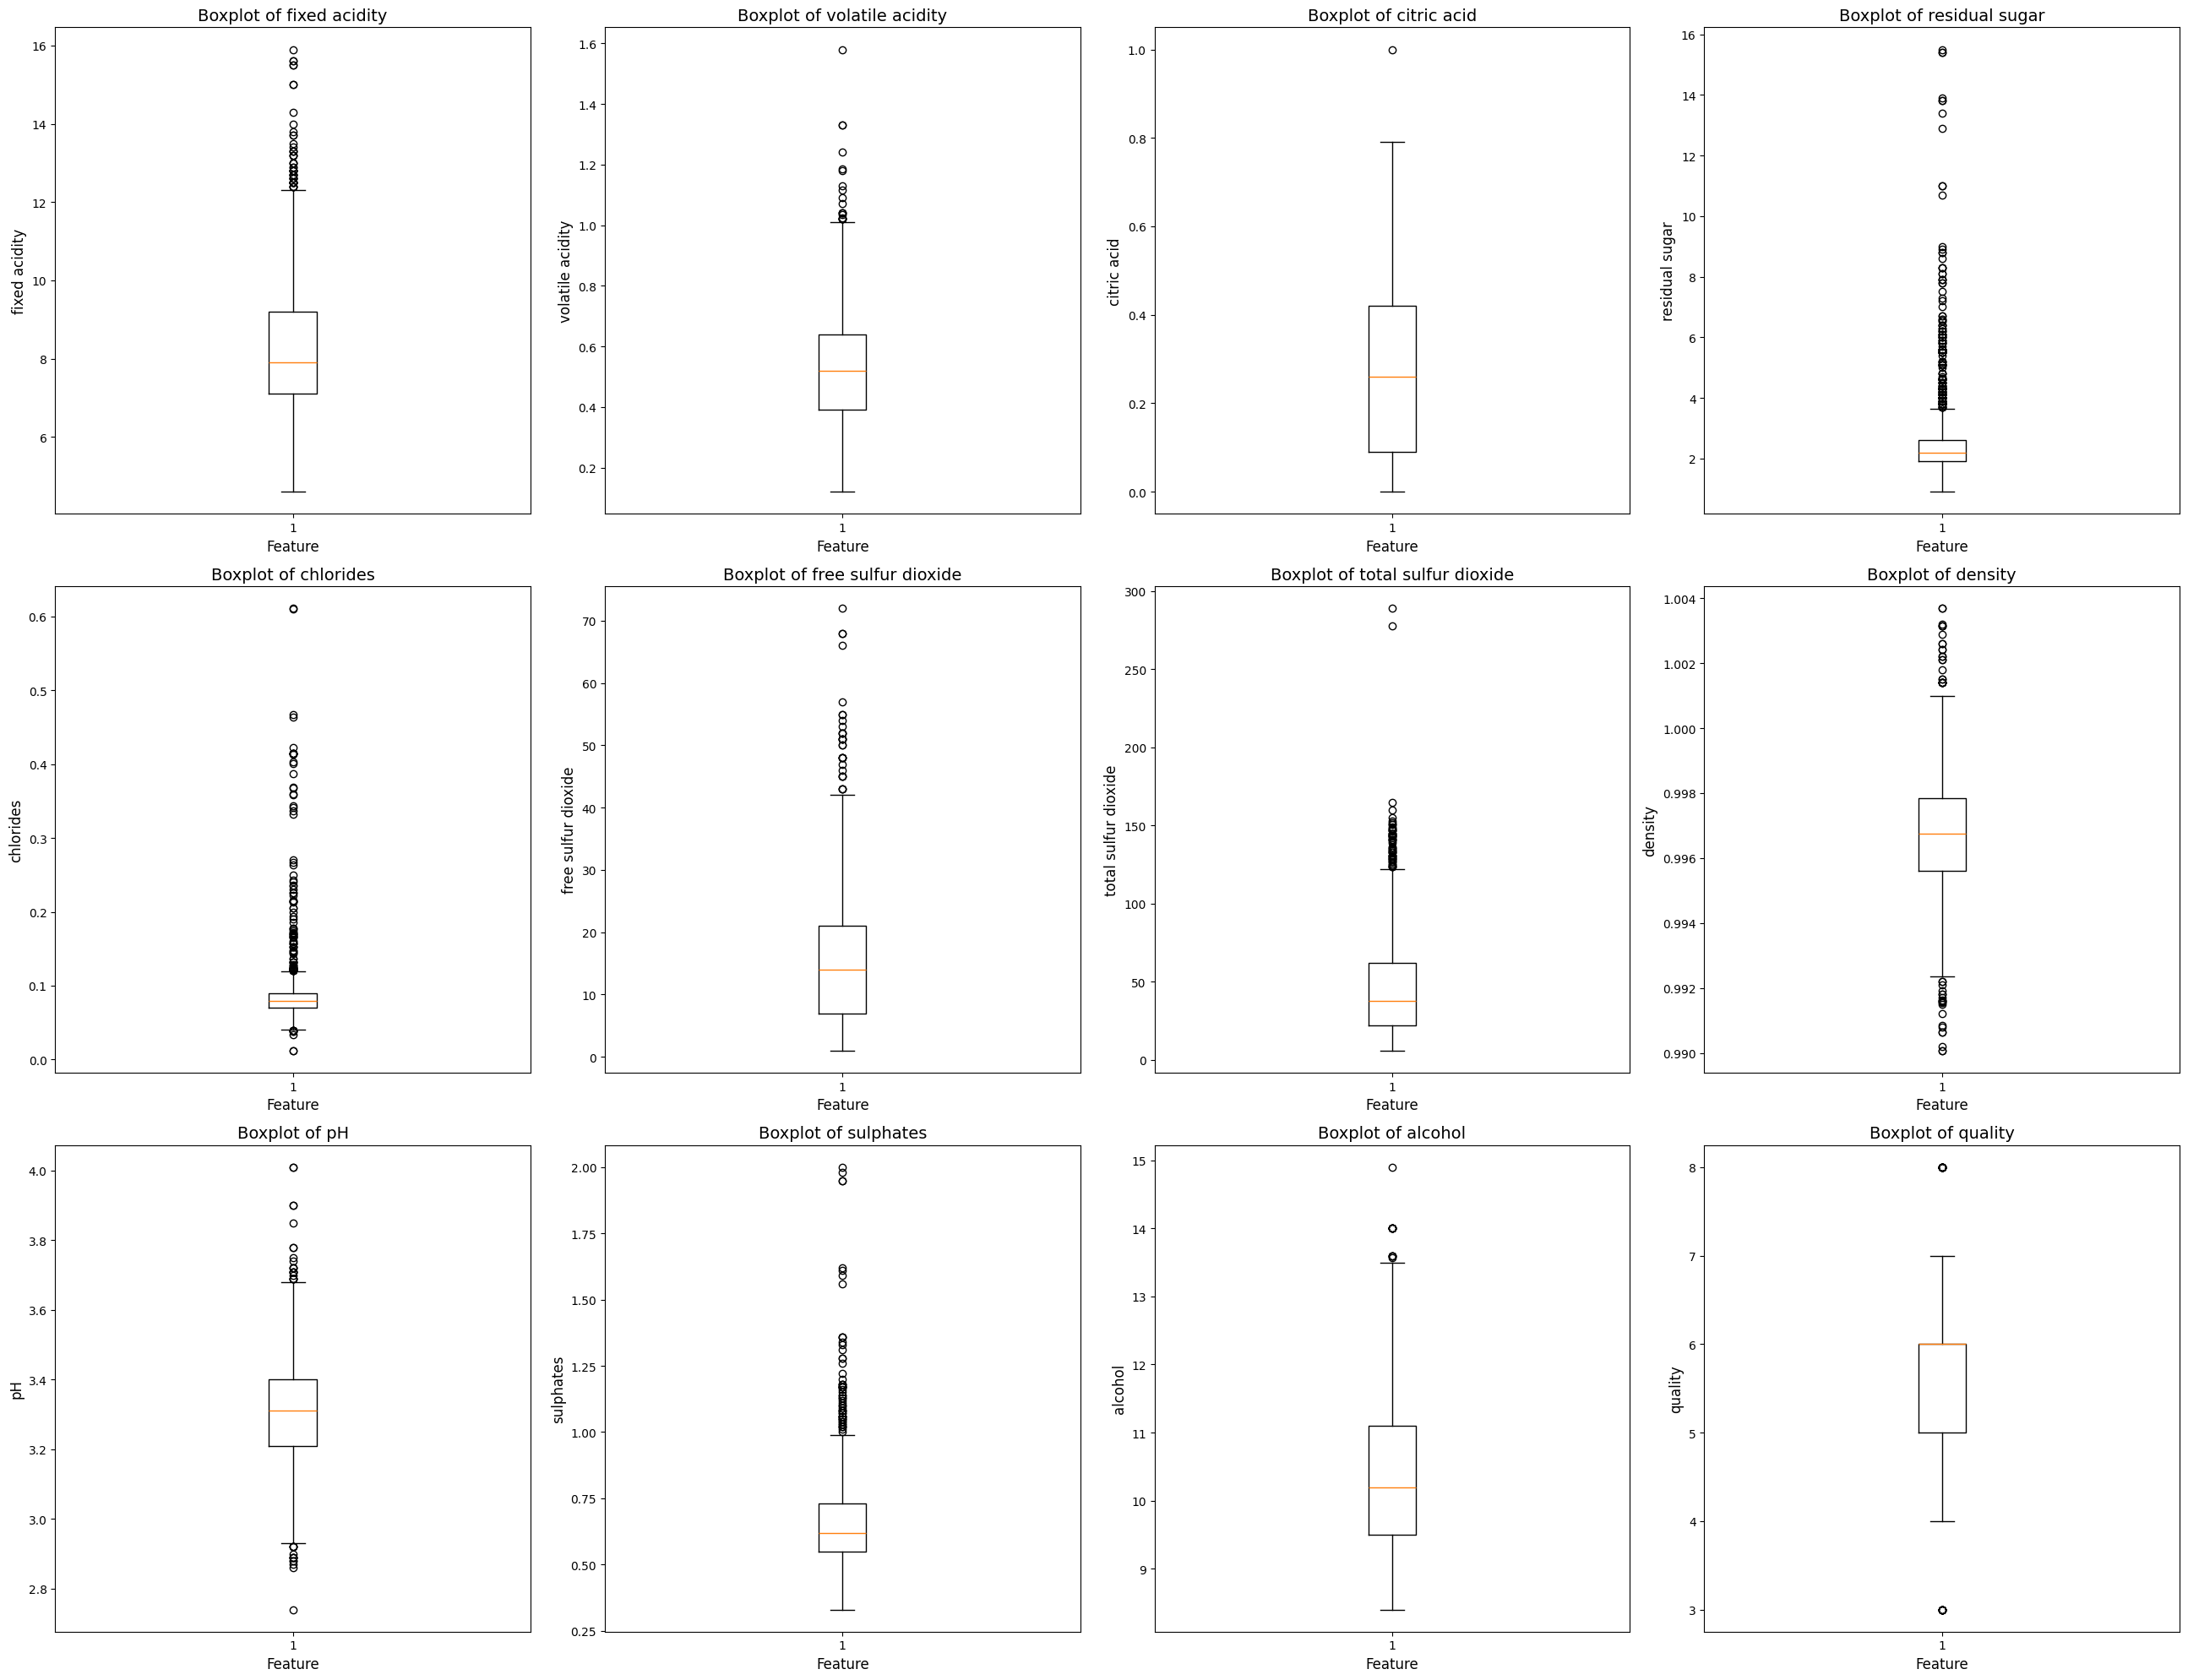

In [46]:
plt.figure(figsize=(26,20))

rows = 3
cols = 4
num_plots = len(col_names)

for i, col in enumerate(col_names):
    if i >= rows * cols:
        break
    plot_position = i + 1
    plt.subplot(rows, cols, plot_position)
    plt.boxplot(df[col], widths=[0.1])
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel('Feature', fontsize=12)
    plt.ylabel(col, fontsize=12)

plt.tight_layout()

plt.show()

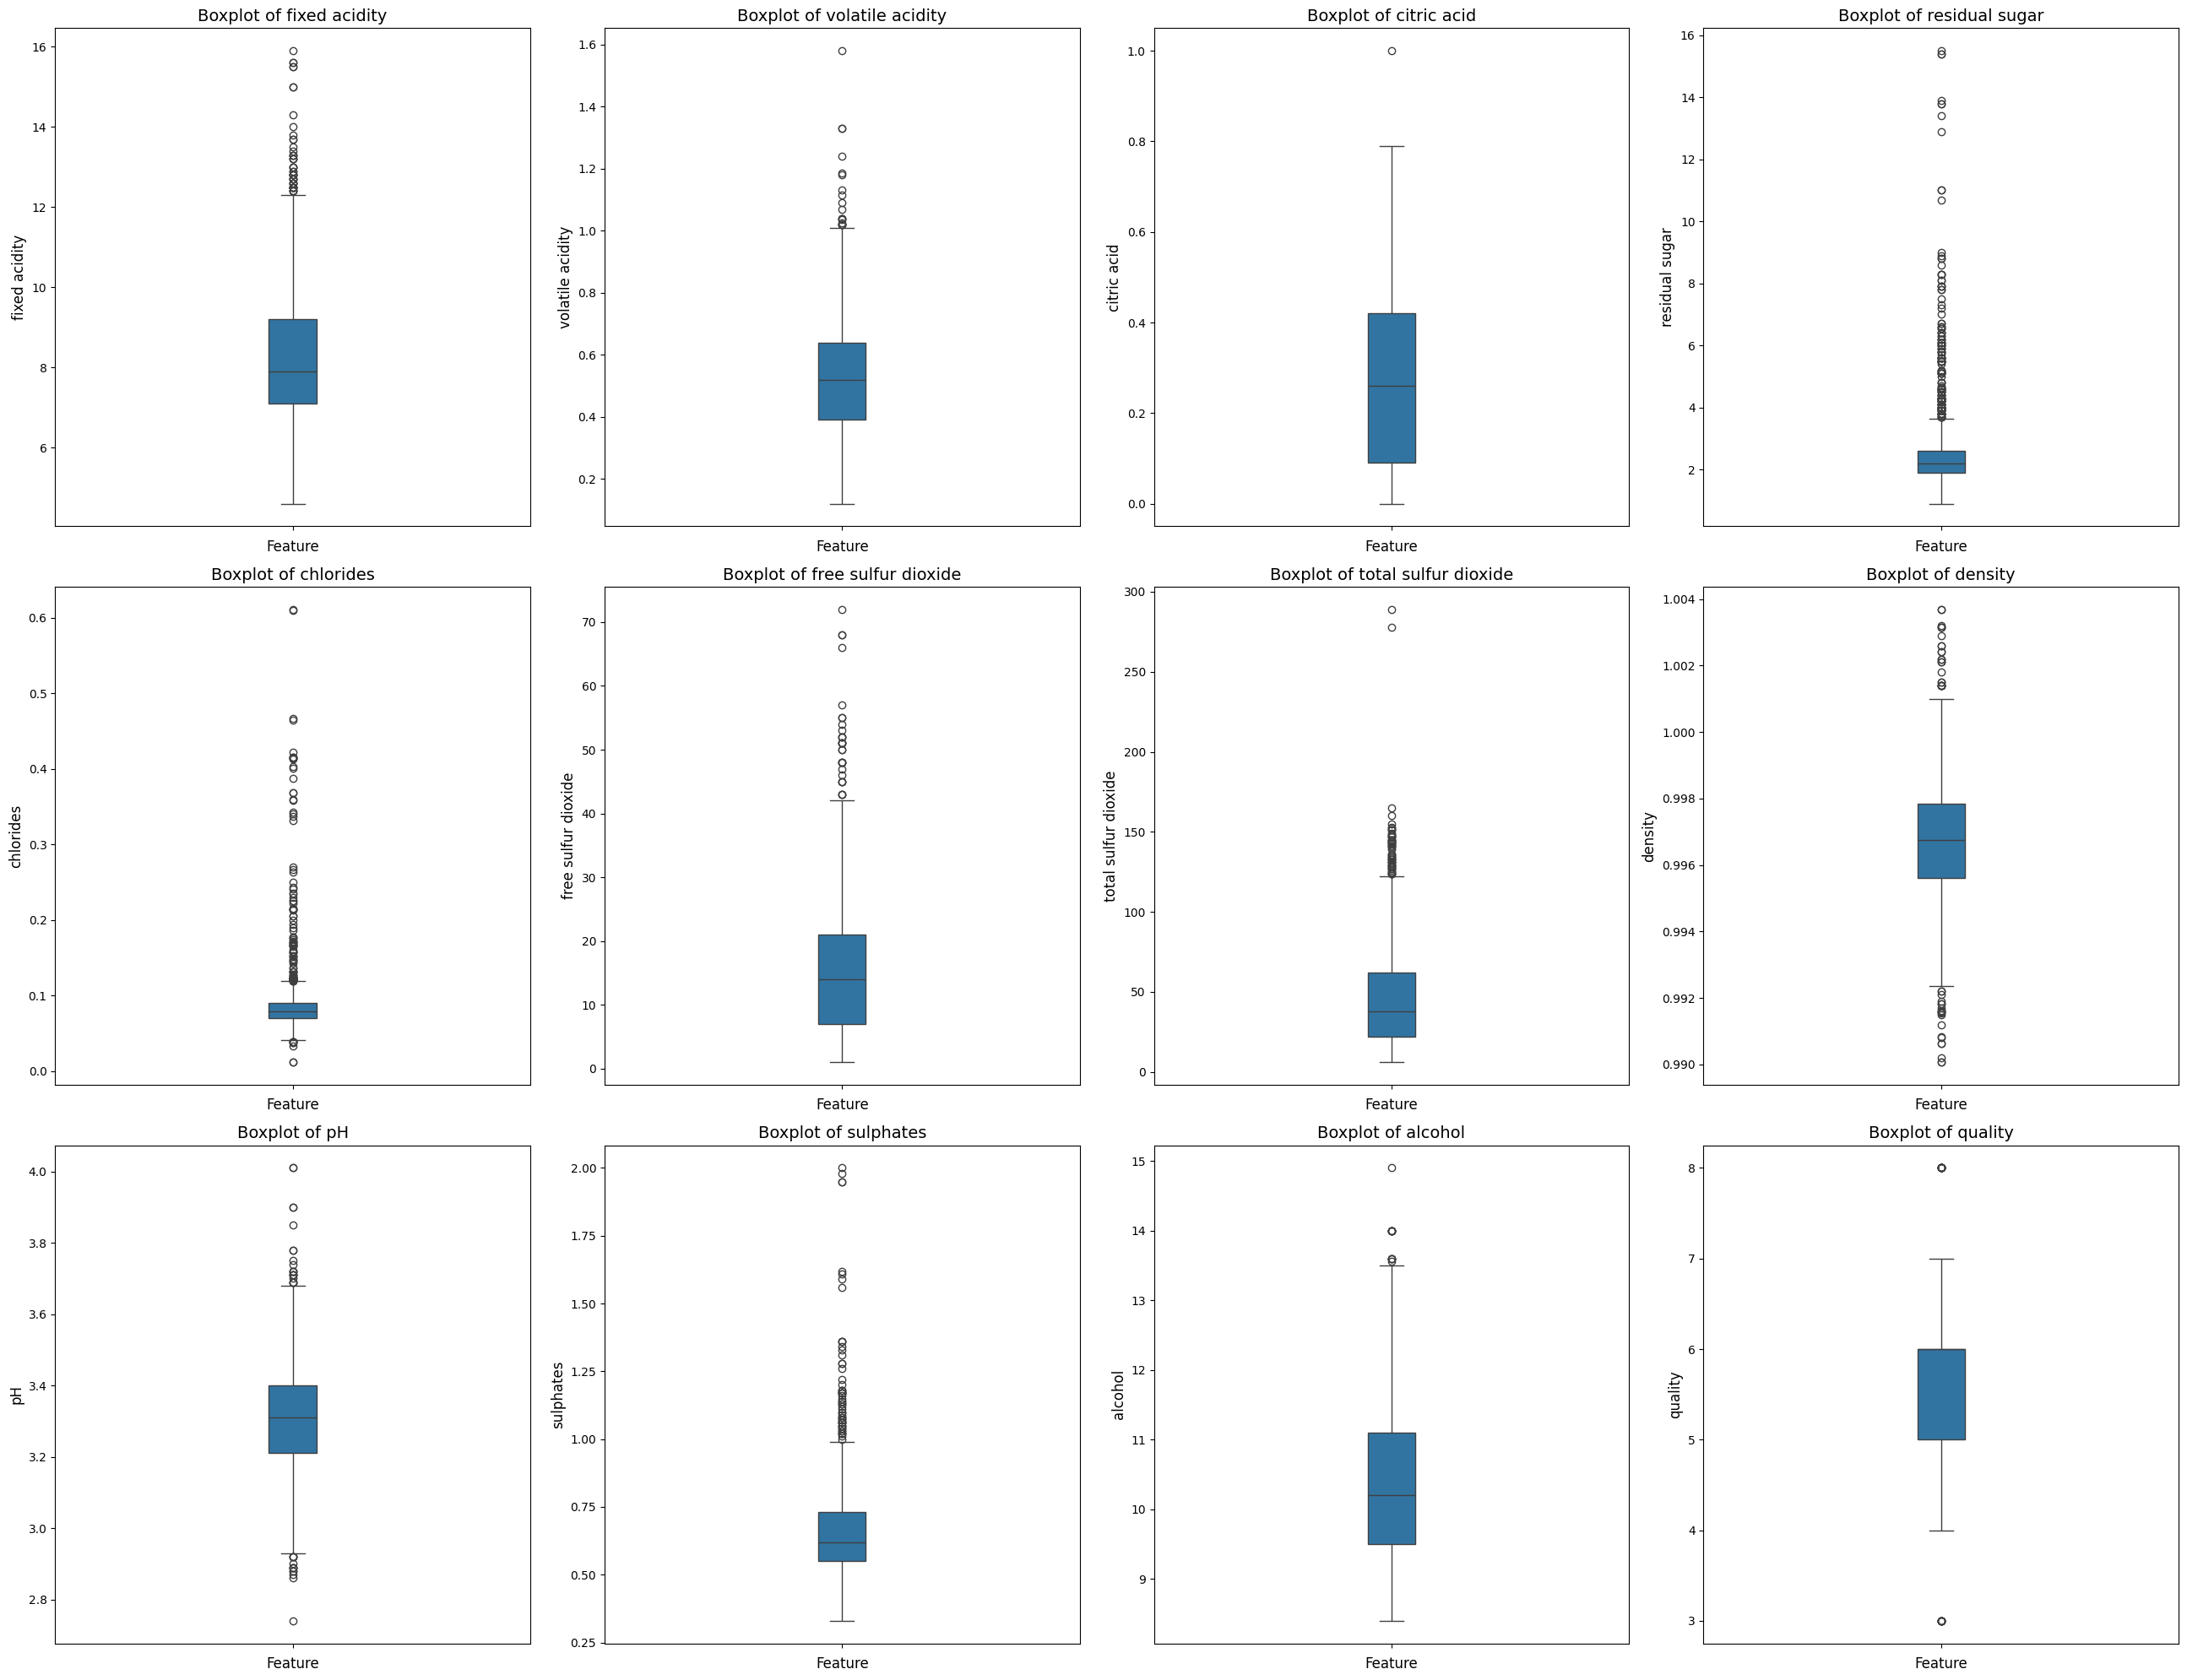

In [47]:
plt.figure(figsize=(26,20))

rows = 3
cols = 4
num_plots = len(col_names)

for i, col in enumerate(col_names):
    if i >= rows * cols:
        break
    plot_position = i + 1
    plt.subplot(rows, cols, plot_position)
    sns.boxplot(df[col], width=0.1)
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel('Feature', fontsize=12)
    plt.ylabel(col, fontsize=12)

plt.tight_layout()

plt.show()

> ### From the above we can observe the nature of outlier in each feature and how it is affecting the data

### Violin Plot

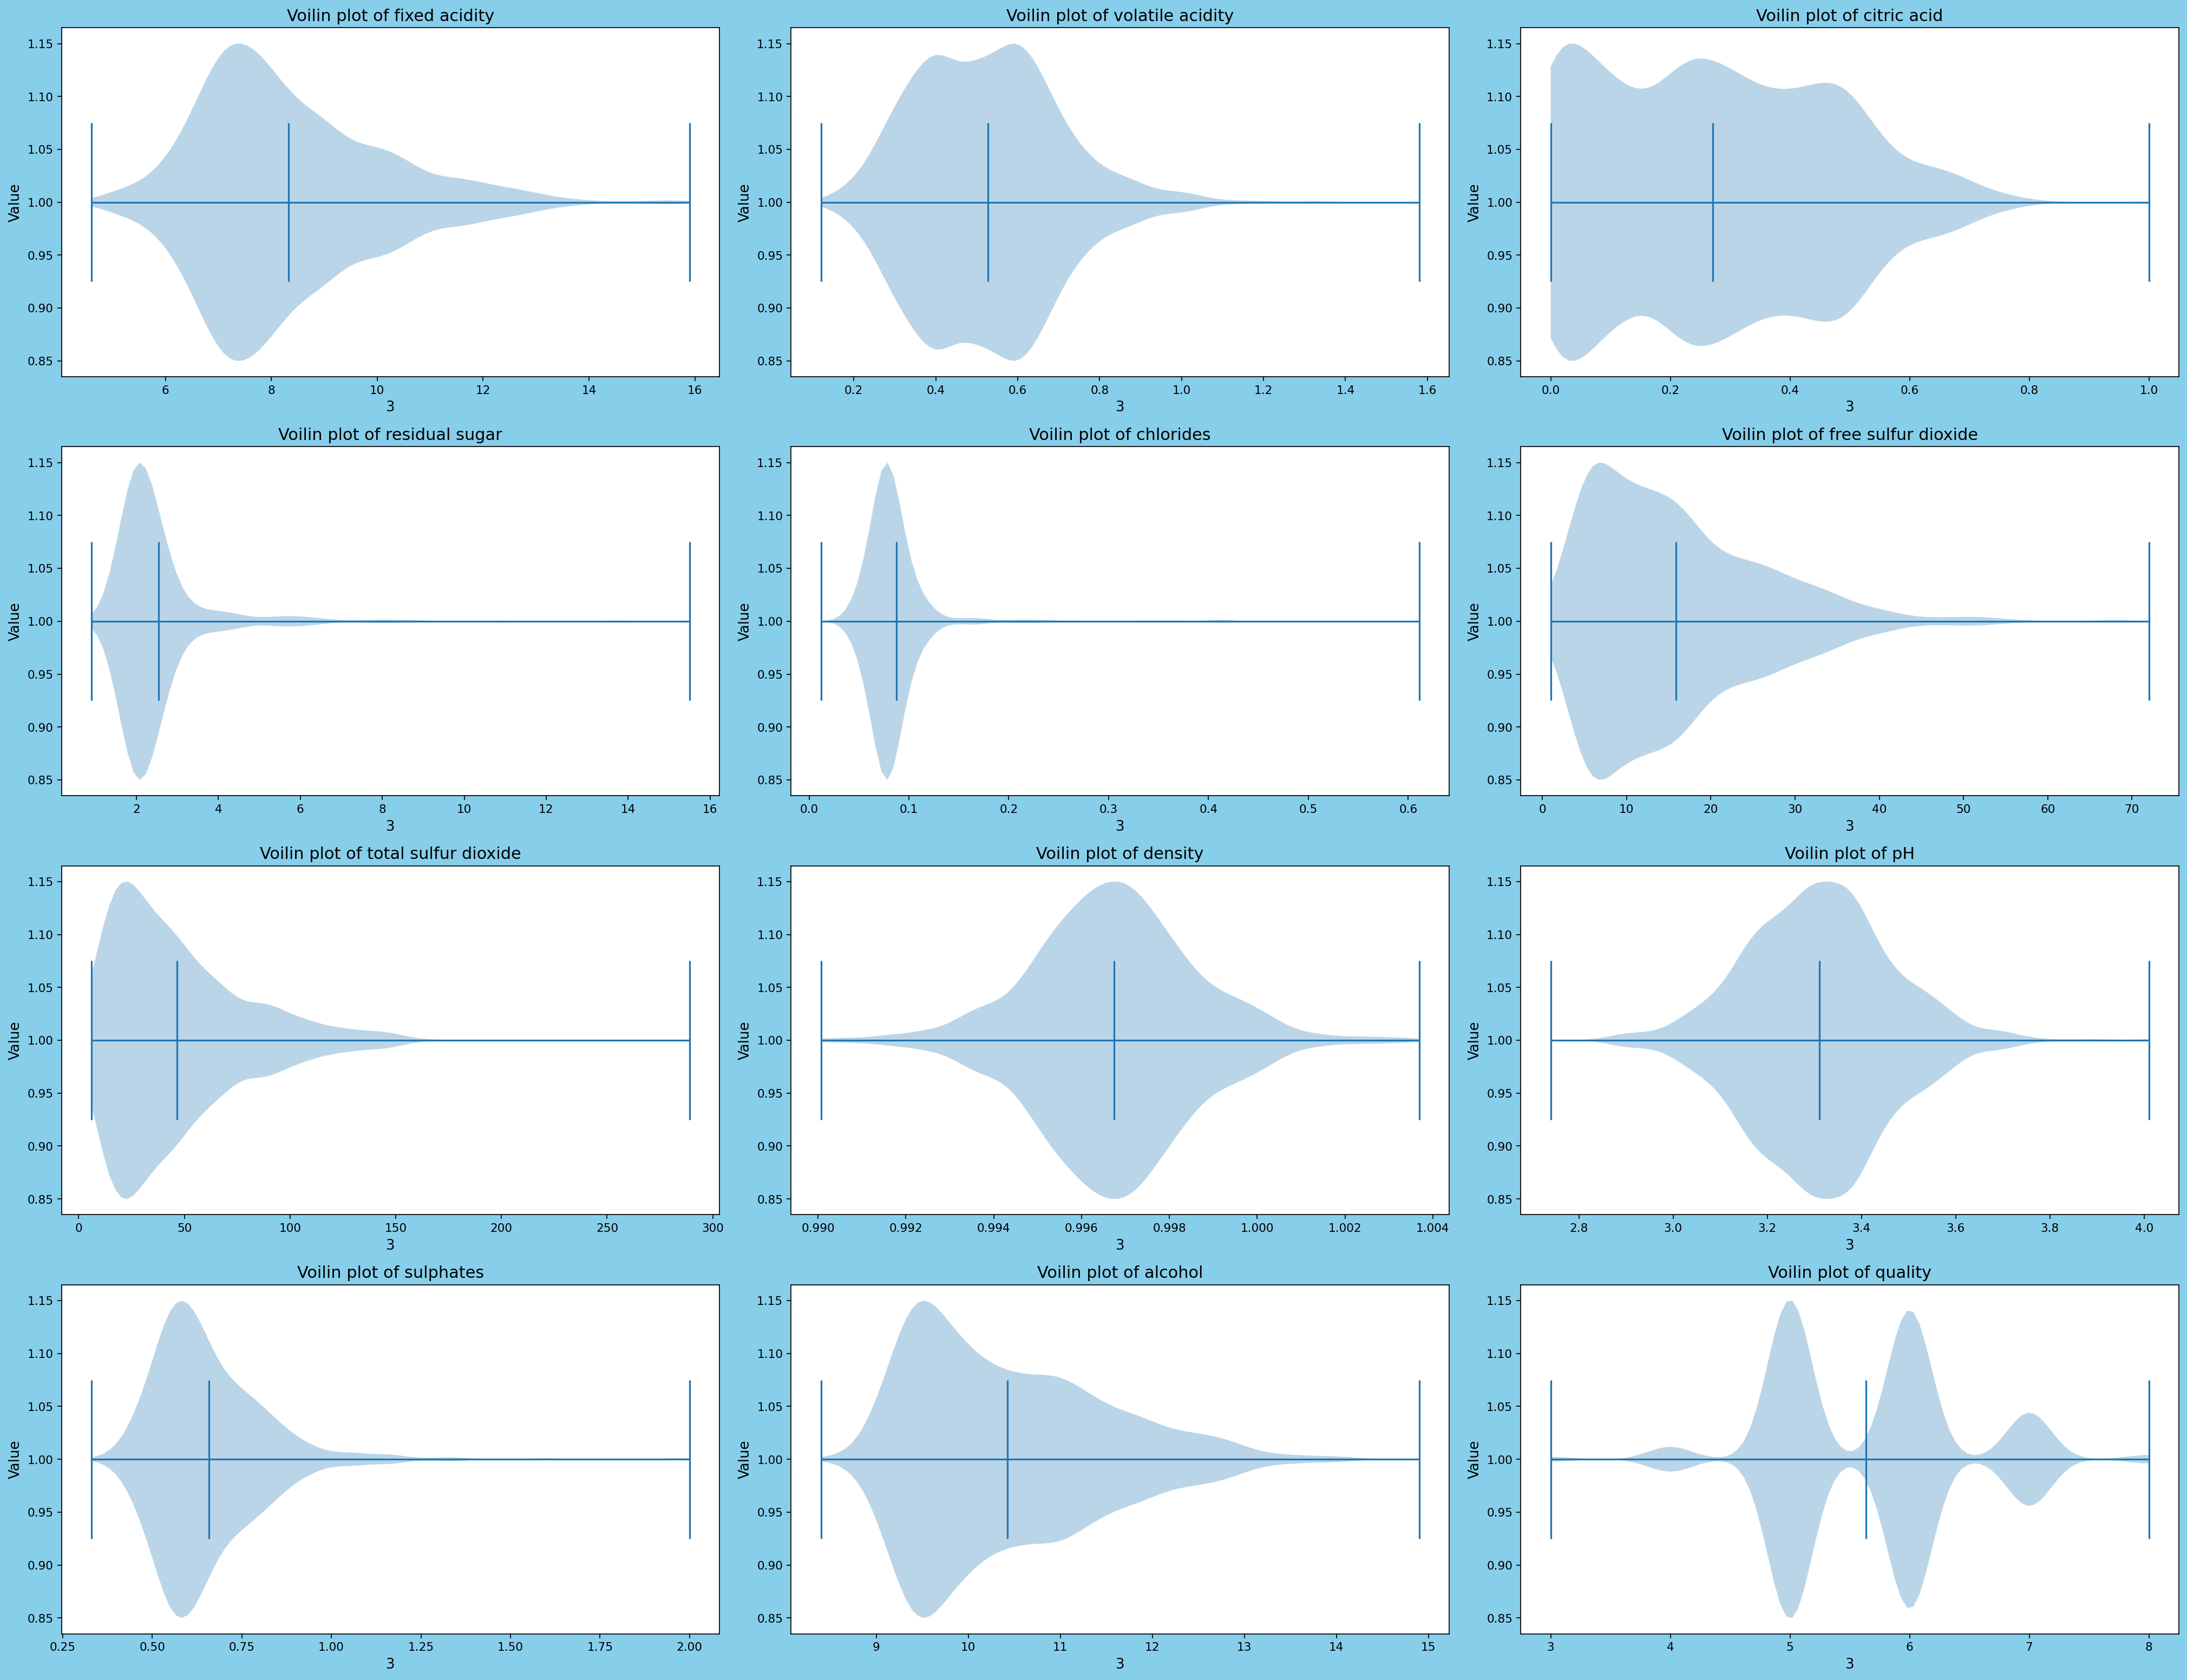

In [48]:
plt.figure(num=12, figsize=(26,20), dpi=156, facecolor='skyblue', edgecolor='red')

row,col=4,3

num_plots=len(col_names)

for i, col_name in enumerate(col_names):
  if i>=row*col:
    break

  plt.subplot(4,3,i+1)
  plt.violinplot(df[col_name], vert=False, widths=0.3, showmeans=True)
  plt.title(f"Voilin plot of {col_name}", fontsize=14)
  plt.xlabel(col, fontsize=12)
  plt.ylabel("Value", fontsize=12)

plt.tight_layout()


plt.show()

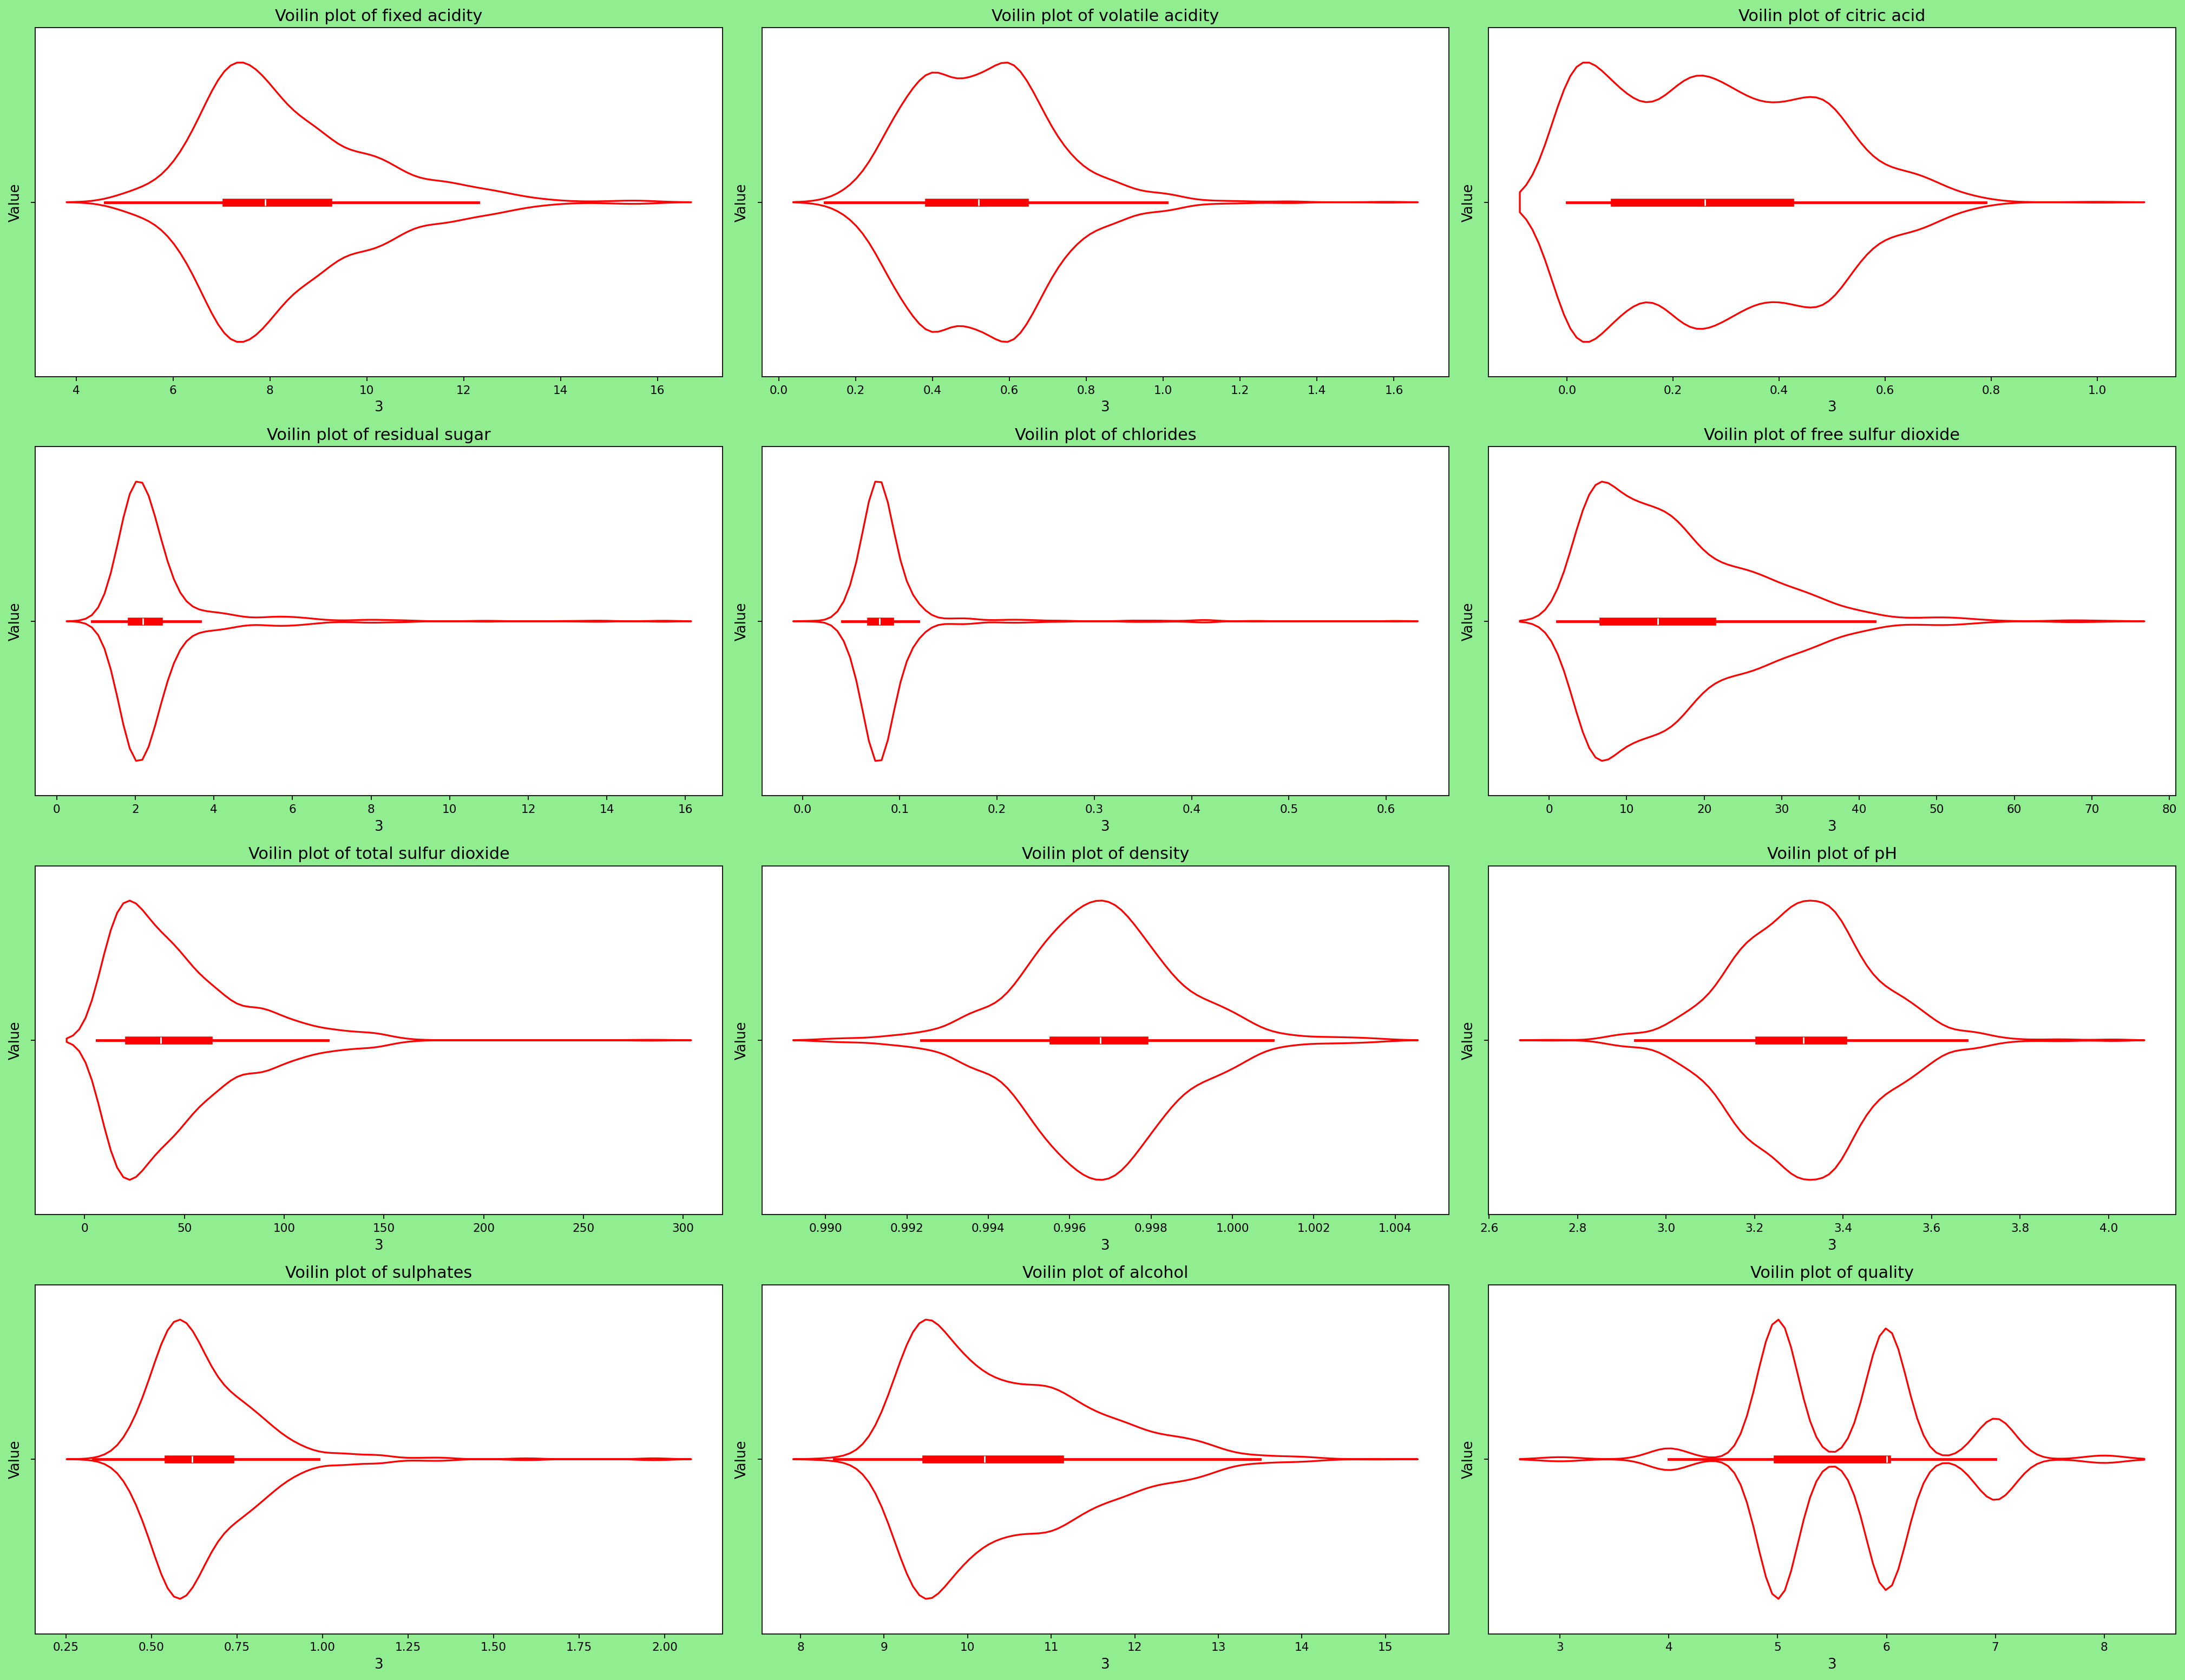

In [49]:
plt.figure(num=12, figsize=(26,20), dpi=156, facecolor='lightgreen', edgecolor='red')

row,col=4,3

num_plots=len(col_names)

for i, col_name in enumerate(col_names):
  if i>=row*col:
    break

  plt.subplot(4,3,i+1)
  sns.violinplot(df[col_name], color='red', fill=False, orient='h')
  plt.title(f"Voilin plot of {col_name}", fontsize=14)
  plt.xlabel(col, fontsize=12)
  plt.ylabel("Value", fontsize=12)

plt.tight_layout()


plt.show()

> ### From the above violin plot we can see the distribution of data